# ReadThreeFishStimliEqualDis_Trifurcation_Vivek

In [1]:
# import system libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt### virtual fish swims with 0.12 m  circle without background
import pickle
import seaborn as sns
import matplotlib
from copy import deepcopy
%matplotlib inline

## Organise with class data

In [2]:
Speeds = np.arange(1,1.01,0.5)
LRDs   = np.arange(0.005,0.101,0.005)

ReadData = True
"""
Read saved data
"""
if ReadData:
    filename = '../Data/fish/3VF_Trifurcation_data'
    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    Results = new_dict['Results']
    Xs = new_dict['Xs']
    Ys = new_dict['Ys']
    infile.close()

In [3]:
Results_exp = deepcopy(Results)

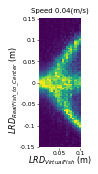

In [4]:
Rotate=False
Results_new = deepcopy(Results_exp)
y = np.linspace(-0.15,0.15,100)

matplotlib.rcParams.update({'font.size': 8})

iLRDs = len(LRDs)
if Rotate:
    fig1, ax1 = plt.subplots(nrows=1,ncols=len(Speeds),sharex=True,sharey=True,figsize=(6.7/5.*len(Speeds),3.15/5.))
    ax1.invert_yaxis()  # Invert y axis
else:
    fig1, ax1 = plt.subplots(nrows=1,ncols=len(Speeds),sharex=True,sharey=True,figsize=(0.6*len(Speeds),2))
ifig = 1


AllBranchPlots = []

for ispeed,speed in enumerate(Speeds):

    Result_filter = np.zeros((100,iLRDs))
    for ilrd, lrd in enumerate(LRDs):
    
        aaa = np.mean(Results_new[:,:,ilrd,ispeed],axis=1)
        Result_filter[:,ilrd] =  (aaa - np.min(aaa))/(np.max(aaa) - np.min(aaa))

    x = np.append(LRDs,LRDs[-1]+np.diff(LRDs)[0])-0.5*np.diff(LRDs)[0]

    z = Result_filter

    if Rotate:
        ax1.pcolor(y,x,z.T,rasterized=True)

    else:
        ax1.pcolor(x,y,z,rasterized=True)

    AllBranchPlots.append(Result_filter)
    TLabel = []
    x1 = x
    y1 = x1/2.0
    y2 = -y1


    ax1.set_title('Speed '+ str(round(Speeds[ispeed]*0.04,3)) + '(m/s)')
    ax1.tick_params(pad=1)

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    
    ax1.set_xticks([0,0.05,0.1])
    ax1.set_xticklabels(['0','0.05','0.1'])
    ax1.set_yticks([-0.15,-0.1,-0.05,0,0.05,0.1,0.15])
    ax1.set_yticklabels(['-0.15','-0.1','-0.05','0','0.05','0.1','0.15'])
    
    ax1.axis('equal')


if Rotate:
    fig1.text(0.5,-0.35, r'$LRD_{RealFish_to_Center}$ (m)', ha="center", va="center",fontsize = 8)
    fig1.text(0.07,0.5, r'$LRD_{VirtualFish}$ (m)', ha="center", va="center", rotation=90,fontsize = 8)
else:
    fig1.subplots_adjust(left=0.01, right=1,  bottom=0.1,  top=1.0, wspace=0.1, hspace=0)
    fig1.text(0.5,0.01, r'$LRD_{VirtualFish} $ (m)', ha="center", va="center",fontsize = 8)
    fig1.text(-0.55,0.5, r'$LRD_{RealFish\_to\_Center}$ (m)', ha="center", va="center", rotation=90,fontsize = 8)
    

fig1.show()


In [5]:
fn = 'fishdata_n3_20200525'

df = pd.read_csv('../Data/fish/'+fn+'.csv')
# df = pd.read_csv('./Data_VivekSimulation/geometry_3VF_MN.csv')
print(df.head())
print(df.keys())

print(np.max(df[' x'].values))

   time        x        y   left_right_distance   front_back_distance
0    10  0.05216  499.970                     0                  75.0
1    20  0.05216  499.932                     0                  75.0
2    30  0.05216  499.881                     0                  75.0
3    40  0.05216  499.871                     0                  75.0
4    50  0.05216  499.822                     0                  75.0
Index(['time', ' x', ' y', ' left_right_distance', ' front_back_distance'], dtype='object')
0.134642


In [6]:
a_lrds = df[' left_right_distance'].values

s_lrds = np.unique(a_lrds)

Results = []
Results.append([])

for ilrd, lrd in enumerate(s_lrds):
    x = df[' x'][a_lrds==lrd].values
    y = df[' y'][a_lrds==lrd].values

    counts,xedges,yedges = np.histogram2d(y,x,bins=100,range=[[-250, 1250], [-0.1, 0.2]])
    Results[-1].append(counts)


Results = np.array(Results)
Results = np.swapaxes(Results,0,2)
Results = np.swapaxes(Results,1,3)
Results = np.swapaxes(Results,2,3)


Results_sim = deepcopy(Results)

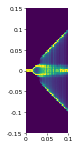

In [7]:

Speeds = np.arange(1,1.01,0.5)

Rotate=False
Results_new = deepcopy(Results_sim)
y = np.linspace(-250,1250,100)

matplotlib.rcParams.update({'font.size': 8})

iLRDs = len(s_lrds)
if Rotate:
    fig1, ax1 = plt.subplots(nrows=1,ncols=len(Speeds),sharex=True,sharey=True,figsize=(6.7/5.*len(Speeds),3.15/5.))
    ax1.invert_yaxis()  # Invert y axis
else:
    fig1, ax1 = plt.subplots(nrows=1,ncols=len(Speeds),sharex=True,sharey=True,figsize=(0.6*len(Speeds),1.92))
ifig = 1


AllBranchPlots = []

for ispeed,speed in enumerate(Speeds):

    Result_filter = np.zeros((100,iLRDs))
    for ilrd, lrd in enumerate(s_lrds):
    
        aaa = np.mean(Results_new[:,:,ilrd,ispeed],axis=1)

        Result_filter[:,ilrd] =  (aaa - np.min(aaa))/(np.max(aaa) - np.min(aaa))

    x = np.append(s_lrds,s_lrds[-1]+np.diff(s_lrds)[0])

    z = Result_filter

    if Rotate:
        ax1.pcolor(y,x,z.T,rasterized=True)

    else:
        ax1.pcolor(x,y,z,rasterized=True)
        
#     ax1.plot([50,500],[500,1000],'r',alpha=0.3)
#     ax1.plot([50,500],[500,0],'r',alpha=0.3)
    AllBranchPlots.append(Result_filter)
    TLabel = []
    x1 = x
    y1 = x1/2.0
    y2 = -y1


#     ax1.set_title('Speed '+ str(round(Speeds[ispeed]*0.04,3)) + '(m/s)')
    ax1.tick_params(pad=1)

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    
    ax1.set_xticks([0,255,510])
    ax1.set_xticklabels(['0','0.05','0.1'])
    ax1.set_yticks([-250,0,250,500,750,1000,1250])
    ax1.set_yticklabels(['-0.15','-0.1','-0.05','0','0.05','0.1','0.15'])
    ax1.axis('equal')


if Rotate:
    fig1.text(0.5,-0.35, r'$LRD_{RealFish_to_Center}$ (m)', ha="center", va="center",fontsize = 8)
    fig1.text(0.07,0.5, r'$LRD_{VirtualFish}$ (m)', ha="center", va="center", rotation=90,fontsize = 8)
else:
    fig1.subplots_adjust(left=0.01, right=1,  bottom=0.1,  top=1.0, wspace=0.1, hspace=0)
fig1.show()
